大問1. irisの分類
================

## Q1. 実装
- つぎの条件にしたがって、あやめ(iris)の分類を行ってください。
- なお、指定された条件以外にも、必要だと思われる処理等を思いついた場合に自由に追加してもらって構いません。

### 条件
- 使用するデータ: [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
- 評価指標: 正答率(Accuracy)
- 評価プロトコル: ホールドアウト(交差検証は不要)
- アルゴリズム: ロジスティック回帰(LogisticRegression)

In [0]:
#データの観察
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [2]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
iris_dataset["data"].shape

(150, 4)

In [19]:
#3クラスの種類
iris_dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
#クラスを0，1，2で表現
iris_dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# 形状を確認
iris_dataset["target"].shape

(150,)

In [0]:
#データセットの分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset.data,iris_dataset.target,random_state=24)

In [25]:
X_train.shape,y_train.shape
X_test.shape,y_test.shape

((38, 4), (38,))

In [9]:
#データをみやすくする為に、可視化にしてみる
import pandas as pd
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset["feature_names"])
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.5,2.3,4.0,1.3
1,6.6,2.9,4.6,1.3
2,5.7,3.0,4.2,1.2
3,4.6,3.6,1.0,0.2
4,5.7,4.4,1.5,0.4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if sys.path[0] == '':


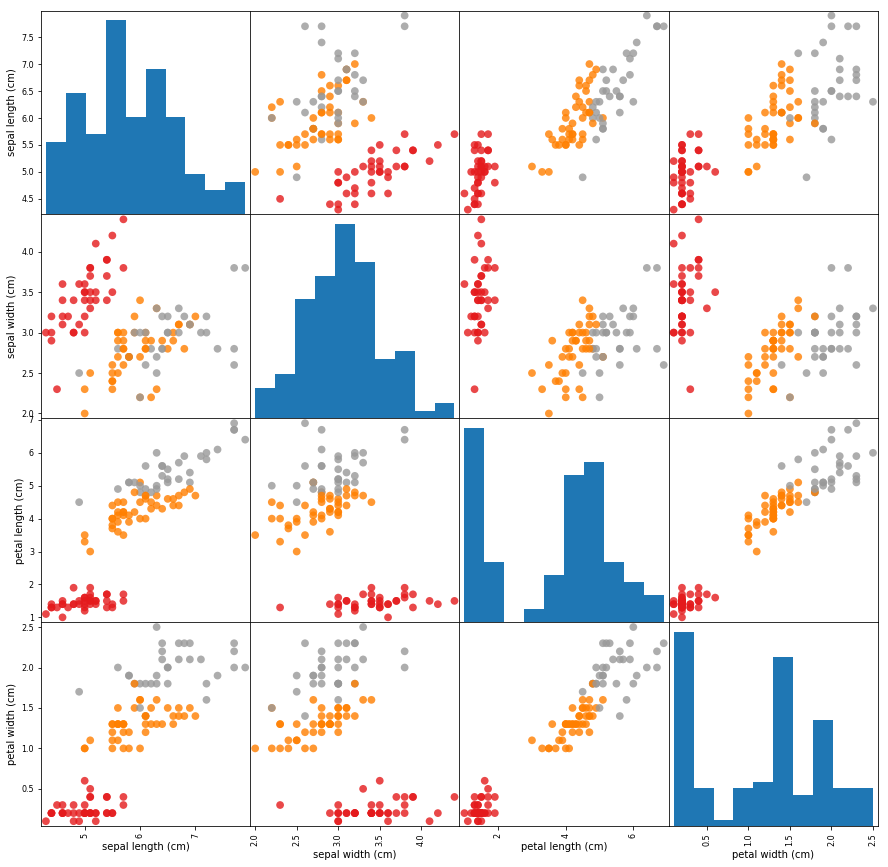

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

grr = pd.scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker="o",
    s=60,
    alpha=0.8,
    cmap="Set1"
)

##可視化してみてどうか？
###sepal(がく片) と petal(花弁) で結構分離できている気がする
###品種を区別するための情報がこのデータに含まれていそう


In [27]:
#ロジスティック回帰でモデルの訓練
from sklearn.linear_model import LogisticRegression

cv_score_logreg=cross_val_score(LogisticRegression(),
                               X_train,
                               y_train,
                               cv=3)
print(cv_score_logreg)

[1.         0.94736842 0.91666667]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed


## Q2. 評価
クライアントに説明することを想定して、最終的な評価や分析結果を記述してください。



In [0]:
#アイリスの花の3クラス分類したいという課題の中で、手元に150個のデータがありました。

In [0]:
#データの中身特徴量を可視化にしてみたところ、Sepalの長さ、幅とPetalの長さ、幅、4つの特超量で、正しい特徴量と判断できた為あがって来た評価は良いと判断致しました。

In [0]:
#アルゴリズムはロジスティック回帰を使い、94%の正答率を得られています。